<center><img src='https://netacad.centralesupelec.fr/img/cs.jpg' width=200></center>

<h6><center>M.Sc. DSBA & AI</center></h6>
<h3><center>Ensemble learning from theory to practice</center></h3>


<h1>
<hr style=" border:none; height:3px;">
<center>Decision Trees & Bagging</center>
<hr style=" border:none; height:3px;">
</h1>


# Introduction


This lab consists of two parts. In the first part, we're going to experiment decision trees approach on both simulated and real data; in the second part, we're going to perform random forest. 

This lab is free from some of the examples shown in the `Scikit-Learn` [global documentation](https://scikit-learn.org/stable/modules/tree.html) and documentation on [random forests for the regression case](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) and [random forests for classification problems](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).


The objectives of this practical session is twofold: 
 + use decision trees for classification and regression problems in python (`sklearn` module);
 + use **bagging** and **random forests** approaches for classification and regression problems in python (`sklearn` module).
 
Useful reference links:
+ [`Scikit-learn` website](https://scikit-learn.org/stable/index.html)
+ [`NumPy` documentation](https://docs.scipy.org/doc/numpy/user/index.html)
+ [`SciPy` documentation](https://docs.scipy.org/doc/scipy/reference/)
+ [`MatPlotLib` documentation](https://matplotlib.org/)
+ [Python website](https://www.python.org/)




# 1. Decision trees

Decision trees are learning methods used for classification and regression prediction problems. The goal is to create a model that predicts the values of the output variable, based on a set of sequences of decision rules (formaly a set of split points) deduced from the training data. The tree therefore approximates the output by a succession of if-then-else rules (leading to terminal nodes). This paradigm works well for both categorical and numerical data. The more complex the generated tree, the more the model "explains"/fits the training data but also the more the chances of overfitting.

**Advantages of decision trees**
+ They are simple to understand and visualize
+ They require little data preparation (standardization, etc.)
+ The cost of using trees is logarithmic
+ They are able to manage categorical and numerical data
+ They are able to deal with multi-class problems
+ White box model: the result is easy to conceptualize and visualize

**Disadvantages of decision trees**

+ Overfitting: sometimes the trees generated are too complex and generalize poorly. Choosing the right values for the maximum depth (`max_depth`) and minimum number of examples per leaf (`min_samples_leaf`) parameters avoids this problem.
+ Sometimes the trees generated are not balanced. It is therefore recommended to adjust the database before construction, to avoid one class largely dominating the others (in terms of the number of training examples).

#### 1.0. Python dependencies and setup

You will need to install some packages allowing to visualize some results of this lab. Run the following command.




In [ ]:
pip install graphviz

In [ ]:
pip install pydot

In [ ]:
pip install pydotplus

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"


import numpy as np
import pandas as pd


# Matplotlib is used to plot graphs
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Style options for plots.
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)



#### 1.1. Classification Decision Trees

In Scikit-learn, the class [sklearn.tree.DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) allows to make a multi-class classification on a database. This class needs as input a matrix X of size `[n_samples, n_features]` containing the data and a vector Y of size `[n_samples]` with the values of the target (output) class.

We start by importing the right modules and building the tree object:


In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

The data:

In [ ]:
X = [[0, 0], [1, 1]]
Y = [0, 1]

Model construction (model will be nammed clf):


In [ ]:
clf = clf.fit(X, Y)


Prediction on new samples:


In [ ]:
clf.predict([[2., 2.]])

array([1])

We can also predict the probability of each class for a sample (which is calculated as the fraction of training data in each terminal node):

In [ ]:
clf.predict_proba([[2., 2.]])

array([[0., 1.]])

#### Iris data classification

DecisionTreeClassifier is able to handle classification problems with several classes (for example, with labels 0, 1,… K-1). In this example we will work with the [Iris](https://archive.ics.uci.edu/ml/datasets/Iris) database, easily accessible in sklearn. This database contains 3 classes of 150 observations, each class referring to a variety of iris (plant). One of the classes is linearly separable from the other two, but the other two are not separable one from the other. The variable to predict is the variety of iris.

Attributes:
+ sepal length in cm 
+ sepal width in cm 
+ petal length in cm 
+ petal width in cm 
+ class: Iris Setosa, Iris Versicolour, Iris Virginica

One sample from the database: 4.9,3.6,1.4,0.1, “Iris-setosa”

In [1]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

Once learning is complete we can view the tree created using the `graphviz` tool. To display it, we create a function `create_tree_graph_png()`:

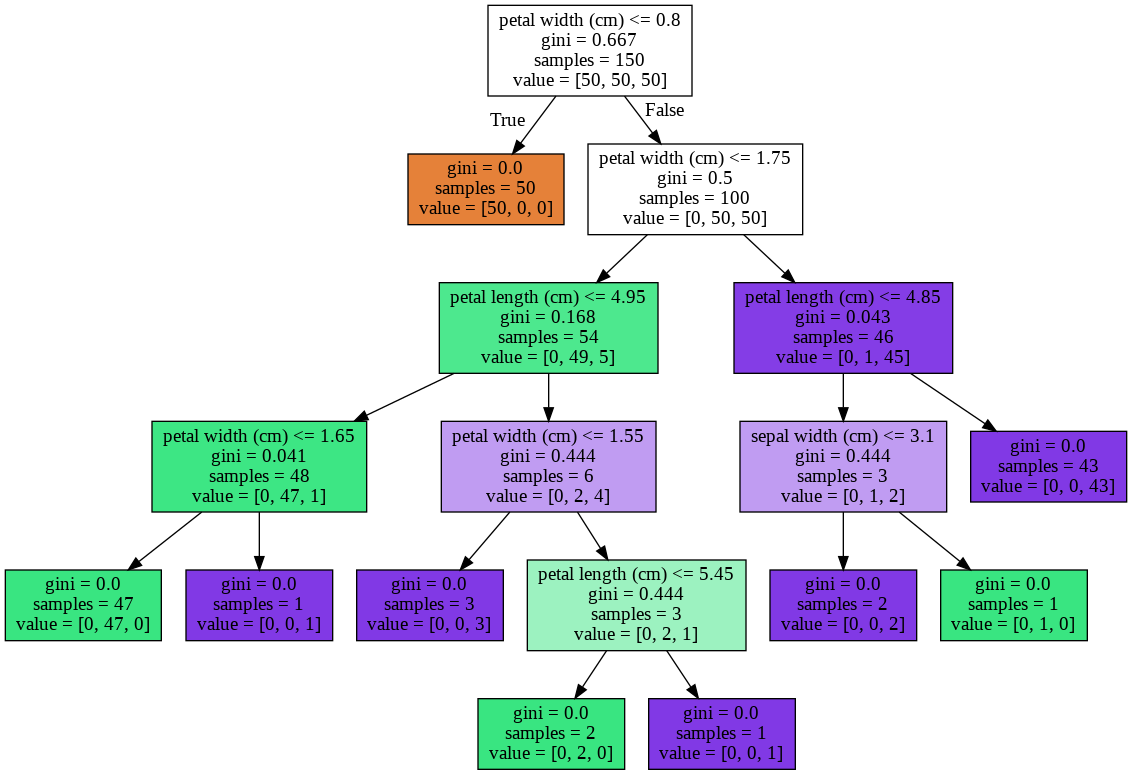

In [2]:
from sklearn.tree import export_graphviz
from IPython.display import Image 
import pydotplus

# Function to create a tree diagram
def create_tree_graph_png(tree, feature_names):
    tree_str = export_graphviz(tree, feature_names=feature_names, filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)  
    graph.write_png('tree.png')
    return Image(graph.create_png())

# Display the tree
create_tree_graph_png(clf, feature_names= iris.feature_names)

The generated image looks like this: 

<figure>
<center><img src='https://github.com/myriamtami/ML-Labs/blob/master/Figures/Iris_Tree.png?raw=true' width=1000></center>
</figure>
 


After its construction, the model can be used for prediction:

In [3]:
print(clf.predict(iris.data[:1, :]))
print(clf.predict_proba(iris.data[:1, :]))

[0]
[[1. 0. 0.]]


<div class="alert alert-block alert-success">

**Question 1.** Change the parameter values `max depth` and `min_samples_leaf`. What do you observe?

</div>

**Solution.** Based on the documentation for [decision trees](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). The `max_depth `parameter is a threshold on the maximum depth of the tree. The `min_samples_leaf` parameter gives the minimum number of samples in a leaf node. They make it possible to put constraints on the construction of the tree and therefore to indirectly control the phenomenon of overfitting. 
    
Example of use :

In [4]:
clf = tree.DecisionTreeClassifier(max_depth = 3)

or, 

In [5]:
clf = tree.DecisionTreeClassifier(min_samples_leaf = 20)

Here is the tree obtained with min_samples_leaf = 20. It has more elements in the leaves, so fewer nodes and the tree is shallower.

<img src="https://raw.githubusercontent.com/myriamtami/ML-Labs/master/Figures/Tree_example.png" width="900" height="900" />

<div class="alert alert-block alert-success">

**Question 2.** Split randomly the database into training/testing sets (70% training, 30% testing) and calculate the rate of misclassified items on the test set. Vary the values of the `max_depth` and `min_samples_leaf` parameters to see their impact on this score.

</div>


**Solution.** In general we use a training / test division of type 80/20 or 70/30.

In [6]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(iris.data, iris.target,
            test_size=0.3, random_state=0)

print('max_depth case:')
for mdepth in [1, 2, 3, 4, 5, 6, 7]:
    clf = tree.DecisionTreeClassifier(max_depth=mdepth)
    clf = clf.fit(X_train, y_train)
    print(clf.score(X_test, y_test))

print('min_samples_split case:')
for msplit in [2, 3, 5, 10, 15, 20, 30, 40, 50, 80]:
    clf = tree.DecisionTreeClassifier(min_samples_split=msplit)
    clf = clf.fit(X_train, y_train)
    print(clf.score(X_test, y_test))



max_depth case:
0.6
0.9111111111111111
0.9777777777777777
0.9777777777777777
0.9777777777777777
0.9777777777777777
0.9777777777777777
min_samples_split case:
0.9777777777777777
0.9777777777777777
0.9777777777777777
0.9777777777777777
0.9777777777777777
0.9777777777777777
0.9777777777777777
0.9111111111111111
0.9111111111111111
0.6


To search for good values for the parameters one can use cross validation with GridSearchCV:

In [7]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(iris.data, iris.target,
    test_size=0.30, random_state=0)

from sklearn.model_selection import GridSearchCV

pgrid = {"max_depth": [1, 2, 3, 4, 5, 6, 7],
      "min_samples_split": [2, 3, 5, 10, 15, 20]}

grid_search = GridSearchCV(tree.DecisionTreeClassifier(), param_grid=pgrid, cv=10)
grid_search.fit(X_train, y_train)
grid_search.best_estimator_.score(X_test, y_test)

0.9777777777777777

**Display of the decision surface**

For a pair of attributes we can visualize the decision surface in 2 dimensions. First we discretize the two-dimensional domain with a constant step and then we evaluate the model on each point of the grid.

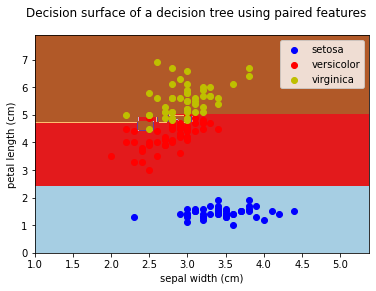

In [8]:
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "bry" # blue-red-yellow
plot_step = 0.02

# Load the data
iris = load_iris()

# Choose the attributes length and width of the petals
pair = [1, 2]

# Keep only the two attributes
X = iris.data[:, pair]
y = iris.target

# Classification Decision Tree learning
clf = DecisionTreeClassifier().fit(X, y)

# Display of the decision surface
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.xlabel(iris.feature_names[pair[0]])
plt.ylabel(iris.feature_names[pair[1]])
plt.axis("tight")

# Display of training points
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], cmap=plt.cm.Paired)
plt.axis("tight")
plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.savefig('fig.png')
plt.show()

<div class="alert alert-block alert-success">

**Question 3.** Redo the display for the other attribute pairs. On which pair is the separation between the classes most marked?

</div>


**Solution.** <img src="https://raw.githubusercontent.com/myriamtami/ML-Labs/master/Figures/Iris-pairs-display.png" width="900" height="900" />

#### 1.2. Regression Decision Trees

For regression with decision trees, Scikit-learn offers the `DecisionTreeRegressor` class. As for the classification, the `fit()` method takes as input the parameter X (attributes of the observations). Please note: the y value are not class labels but real (numerical) values.

In [ ]:
X = [[0, 0], [2, 2]]
y = [0.5, 2.5]
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)
clf.predict([[1, 1]])

array([0.5])

In the following example we will build a sine wave signal affected by white noise and we will learn a regression tree on this training data.

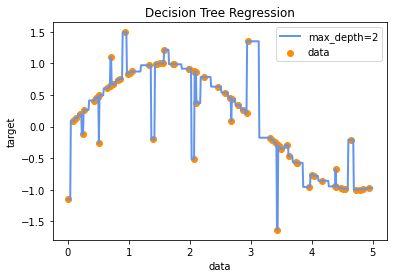

In [ ]:
from sklearn.tree import DecisionTreeRegressor


# Create training data
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Learn the model
regr_1 = DecisionTreeRegressor(max_depth=10)
regr_1.fit(X, y)

# Prediction
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)

# Display the results
plt.figure()
plt.scatter(X, y, c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [ ]:
print(len(y))
print(len(y[::5]))

80
16


<div class="alert alert-block alert-success">

**Question 4.** Change the value of the `max_depth` parameter. What happens if we take a too large value? Too small ? Change the rate of elements affected by noise (`y[:: 5]`). When all the elements are affected by noise, should we prefer a high or low value for `max_depth`?

</div>

**Solution.** If `max_depth` has a too large value, the model follows the noise, so we are in a situation of overfitting. If `max_depth` has a too small value, the resulting model does not follow the data well: we are in a situation of underfitting. In both cases the power of generalization is affected. It is therefore necessary to prefer an intermediate value, which makes it possible to make a compromise according to the cost of the errors (it depends on the application).


<div class="alert alert-block alert-success">

**Question 5.** Load the Diabetes database from the `sklearn.datasets` module and make a random partition in the training part and the test part (70% training, 30% test). Build a regression tree model on the training set. Calculate the mean square error on the test set. Do a grid search to find the value of the `max_depth` parameter which minimizes this error.

</div>

**Solution.** 

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X_train, X_test, y_train, y_test = model_selection.train_test_split(diabetes.data, diabetes.target, test_size=0.30, random_state=0)

clf = DecisionTreeRegressor(max_depth=4)
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_test)
mean_squared_error(y_test, y_predicted)
#result# 4365.3425018803518

pgrid = {"max_depth": [2, 3, 4, 5, 6, 7]}
grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid=pgrid, scoring='neg_mean_squared_error', cv=10)
grid_search.fit(X_train, y_train)
y_predicted = grid_search.best_estimator_.predict(X_test)
print("MSE: ", mean_squared_error(y_test, y_predicted))
#result#  4029.0729322641987
print("max_depth: ", grid_search.best_params_)
#result# {'max_depth': 2}

MSE:  4029.0729322641987
max_depth:  {'max_depth': 2}


# 2. Random Forest & Bagging

### Ensemble methods

The ensemble methods for statistical learning algorithms (ie: ensemble learning) are based on the idea of combining the predictions of several predictors (or classifiers) for better generalization and to compensate for any defects of individual predictors.

Usually, there are two families of such methods:

   1. Averaging (aggregating is a more appropriate word) methods (such as bagging and random forests) where the principle is to average several predictions while hoping for a better result following the reduction in variance of the average estimator (note that for the classification case, we consider the majority vote).
   2. Adaptive methods (boosting) where the parameters are iteratively adapted to produce a better mixture (we introduced them through the last lecture).

In the following we will explore the algorithm classes cited in the first point using `Scikit-learn` and present some comparisons.

### Bagging

Bagging methods build several instances of an estimator, computed on random samples taken from the learning base (and possibly a part of the attributes, also randomly selected), and then combines the individual predictions by averaging them to reduce the variance of the estimator. Their main advantage lies in the fact that they build an improved version of the basic algorithm, without asking for modification of this algorithm. The price to pay is a higher computation cost. 

In `Scikit-learn`, the bagging methods are implemented via both the `BaggingClassifier` and `BaggingRegressor` class. The constructors take as parameters a basic estimator and the strategy for selecting points and attributes:

+ `base_estimator`: optional (default = None). If None then the estimator is a decision tree.
+ `max_samples`: the size of the random sample taken from the learning database.
+ `max_features`: the number of attributes drawn at random.
+ `bootstrap`: boolean, optional (default = True). Draw data points $(x_i,y_i)$ with replacement or not.
+ `bootstrap_features`: boolean, optional (default = False). Attributes drawing with replacement or not.
+ `oob_score`: boolean. Estimate or not the OOB (Out-of-Bag) generalization error.

The following code builds a set of basic `KNeighborsClassifier` classifiers, each using a 50% sample of learning data points and 50% of the attributes (features):

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)

In this example we will use the digits database, which contains 10 classes (images of numbers in handwriting). There are 1797 instances, each instance has 64 attributes.

(1797, 64)


<Figure size 432x288 with 0 Axes>

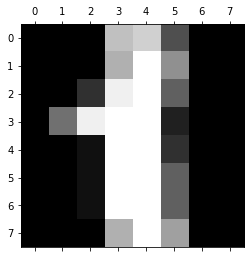

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)
# Display one picture
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[1])
plt.show()

The basic classifier is a decision tree:

In [ ]:

X=digits.data
y=digits.target
clf = tree.DecisionTreeClassifier()
clf.fit(X, y)
accuracy=clf.score(X,y)
print('accuracy ', accuracy)

accuracy  1.0


On the learning set, accuracy = 1. For more realism, we split the learning set into a train/test set in order to see the behavior of the tree on new data (different from that of training):

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
#clf = tree.DecisionTreeClassifier()
clf = tree.DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
accuracy=clf.score(X_test,y_test)
print('accuracy ', accuracy)

accuracy  0.6851851851851852


<div class="alert alert-block alert-success">

**Question 6.** Compute the mean and the variance of the `accuracy` value on 100 draws for the train/test splitting. Compute then the standard deviation and the confidence interval with 95 $\%$ probability of containing the true mean parameter. What can we conclude?

</div>

**Solution.** 

In [ ]:
import math
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

digits = load_digits()
X=digits.data
y=digits.target
N = 100
accuracy = np.zeros(N)
for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    clf = tree.DecisionTreeClassifier(max_depth=5)
    #clf = tree.DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    Z = clf.predict(X_test)
    accuracy[i]=clf.score(X_test,y_test)
    #print(accuracy[i])

print('Mean of accuracy ', np.mean(accuracy), 'Standard deviation of accuracy ', np.sqrt(np.var(accuracy)))

Mean of accuracy  0.6641481481481482 Standard deviation of accuracy  0.03565141399181682


**Solution (end).** If we execute the code several times, with the option `max_depth=5` we get values around mean = 0.67 and stdev = $\sigma$ = 0.04. If we consider a gaussian distribution, the accuracy values will end up with a probability of 99.8% in a range of ± $3.09\frac{\sigma}{sqrt(100)}$ around the mean, which gives a variation interval of $6.18\frac{\sigma}{10}$ = 0.025 = 2.5%. Decision trees therefore produce classifiers with an unsatisfactory error rate (we want to be close to 1 value) that is not very stable (depending on the learning set too) and difficult to improve.


To compare, we will build a bagging classifier on our data with a basic `DecisionTreeClassifier` classifier (two trees are proposed here; one tree with more random through the option `max_features=0.5`):

In [ ]:
clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, n_estimators=100)
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
accuracy=clf.score(X_test,y_test)
print("Accuracy of bagging classifier ", accuracy)

clf_more_rd = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=100)
clf_more_rd.fit(X_train, y_train)
Z_more_rd = clf_more_rd.predict(X_test)
accuracy_more_rd=clf_more_rd.score(X_test,y_test)
print("Accuracy of bagging classifier with more random ", accuracy_more_rd)

Accuracy of bagging classifier  0.9425925925925925
Accuracy of bagging classifier with more random  0.9703703703703703


<div class="alert alert-block alert-success">

**Question 7.** Compute the variance of the accuracy value on 100 draws for the train/test splitting. Compare with the variance of the base classifier. What can we conclude?

</div>

**Solution.** 

In [ ]:
accuracy = np.zeros(N)
for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    #clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, n_estimators=200)
    clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=100)
    #Empirically, max_features=0.5 (The number of features to draw from X to train each base estimator) allows to decrease the variance
    #by adding a random effect
    #Remark: for a tree, max_features=The number of features to consider when looking for the best split et par defaut = n_features)
    clf.fit(X_train, y_train)
    Z = clf.predict(X_test)
    accuracy[i]=clf.score(X_test,y_test)
    #print(accuracy[i])

print('Mean of accuracy ', np.mean(accuracy), 'Standard deviation of accuracy ',np.sqrt(np.var(accuracy)))

Mean of accuracy  0.9662777777777778 Standard deviation of accuracy  0.008828090687412828


**Solution (end).** We obtain a better classifier (`accuracy` ~ 96%) with a better stability (standard deviation is divided by 5).

<div class="alert alert-block alert-success">

**Question 8.** Construct and plot accuracy vs `n_estimators`. What do you observe?

</div>

**Solution.** The error rate decreases with `n_estimators`, but from a value it stabilizes, so we gain nothing from this value of `n_estimators`, except that the algorithm becomes slower. In the following code we took `test_size` = 0.5 to make the effect more visible.

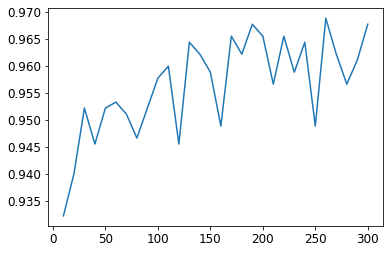

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

digits = load_digits()
X=digits.data
y=digits.target
N = 30
accuracy = np.zeros(N)

for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=(i+1)*10)
    clf.fit(X_train, y_train)
    Z = clf.predict(X_test)
    accuracy[i]=clf.score(X_test,y_test)

import matplotlib.pyplot as plt
plt.plot([10*(i+1) for i in range(30)], accuracy)
plt.show()

<div class="alert alert-block alert-success">

**Question 9.** By using cross valisation with [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV), [tune](https://scikit-learn.org/stable/modules/grid_search.html) (i.e: search for the best values of) both parameters `max_samples` and `max_features` parameters. In other words, search of the values of these parameters allowing to get the best result? For which values do we get this best result? 

</div>

**Solution.** 

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()
X=digits.data
y=digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

from sklearn.model_selection import GridSearchCV
pgrid = {"max_samples": [0.2, 0.4, 0.6, 0.8],
        "max_features": [0.2, 0.4, 0.6, 0.8]}
grid_search = GridSearchCV(BaggingClassifier(tree.DecisionTreeClassifier()), param_grid=pgrid, cv=5)
grid_search.fit(X_train, y_train)
best_score=grid_search.best_estimator_.score(X_test, y_test)
best_max_samples=grid_search.best_estimator_.max_samples
best_max_features=grid_search.best_estimator_.max_features
print("best_score ", best_score)
print("best_max_samples ", best_max_samples)
print("best_max_features ", best_max_features)

best_score  0.9377085650723026
best_max_samples  0.8
best_max_features  0.6


**Solution.** The code displays (your results will be slightly different) a score of 93% obtained for `max_samples` = 0.8 and `max_features` = 0.6.

### Random Forests

The random forest algorithm proposes an aggregation of decision trees. It uses the same principle as bagging, but with an additional step of randomization in the selection of the attributes of the nodes in order to reduce the variance of the obtained estimator. The two Python objects that implement random forests are `RandomForestClassifier` and `RandomForestRegressor`. The most important parameters are:

   1. `n_estimators`: integer, optional (default = 10). The number of trees.
   2. `max_features`: the number of attributes to consider in each split.
   3. `max_samples`: the size of the random sample taken from the learning base.
   4. `min_samples_leaf`: the minimum number of elements in a leaf node.
   5. `oob_score`: boolean. Estimate or not the OOB (Out-of-Bag) generalization error.

Thereafter we will redo the classification based on Digits using a `RandomForestClassifier` classifier:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
digits = load_digits()
X=digits.data
y=digits.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
accuracy=clf.score(X_test,y_test)

<div class="alert alert-block alert-success">

**Question 10.** How does the value of the accuracy variable compare with the bagging case that uses the same number of trees (200 in our case)?

</div>

**Solution.** 

In [ ]:
digits = load_digits()
X=digits.data
y=digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
print(clf.score(X_test,y_test))

clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, n_estimators=200)
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
print(clf.score(X_test,y_test))

clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
print(clf.score(X_test,y_test))

0.8220244716351501
0.9332591768631813
0.982202447163515


**Solution.** The previous code displays:

`0.8164627363737486 0.9521690767519466 0.9744160177975528`

This confirms our expectation: random forests produce a slightly better classifier on this database.

<div class="alert alert-block alert-success">

**Question 11.** Compute the variance of the accuracy value on 100 draws for the train/test splitting. What can we conclude by comparing with the previous section (bagging)?

</div>

**Solution.** 

In [ ]:

digits = load_digits()
X=digits.data
y=digits.target
N = 100

accuracy = np.zeros(N)
for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    clf = BaggingClassifier(tree.DecisionTreeClassifier(), n_estimators=30)
    clf.fit(X_train, y_train)
    Z = clf.predict(X_test)
    accuracy[i]=clf.score(X_test,y_test)

print(np.mean(accuracy), np.sqrt(np.var(accuracy)))


accuracy = np.zeros(N)
for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    clf = RandomForestClassifier(n_estimators=30)
    clf.fit(X_train, y_train)
    Z = clf.predict(X_test)
    accuracy[i]=clf.score(X_test,y_test)

print(np.mean(accuracy), np.sqrt(np.var(accuracy)))

0.9328698553948831 0.010629027587148782
0.959488320355951 0.00553314117880287


**Solution.** The code displays:

`0.936484983315 0.0103328599427 0.957953281424 0.00600667408231`

So we have not only a lower average error rate, but also a lower variance.

<div class="alert alert-block alert-success">

**Question 12.** Plot the accuracy vs `n_estimators` graph. What do you notice? From what n_estimators value do we no longer improve?

</div>

**Solution.** 

10 0.9254727474972191
20 0.9599555061179088
30 0.9532814238042269
40 0.9421579532814238
50 0.9688542825361512
60 0.9688542825361512
70 0.9744160177975528
80 0.9744160177975528
90 0.9688542825361512
100 0.9721913236929922
110 0.9699666295884316
120 0.9599555061179088
130 0.9744160177975528
140 0.9733036707452726
150 0.9688542825361512
160 0.9688542825361512
170 0.9777530589543938
180 0.9755283648498332
190 0.9755283648498332
200 0.9699666295884316
210 0.9710789766407119
220 0.9699666295884316
230 0.9632925472747497
240 0.9666295884315906
250 0.9721913236929922
260 0.967741935483871
270 0.9799777530589544
280 0.9733036707452726
290 0.9699666295884316
300 0.9733036707452726
mean of accuracy  0.9676677790137191


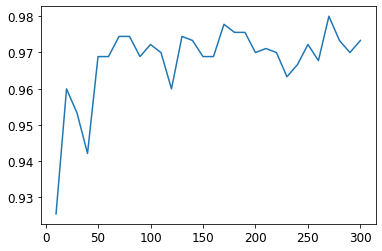

In [ ]:
digits = load_digits()
X=digits.data
y=digits.target
N = 30
accuracy = np.zeros(N)

for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    clf = RandomForestClassifier(n_estimators=(i+1)*10)
    clf.fit(X_train, y_train)
    Z = clf.predict(X_test)
    accuracy[i]=clf.score(X_test,y_test)
    print((i+1)*10, accuracy[i])

import matplotlib.pyplot as plt
plt.plot([10*(i+1) for i in range(30)], accuracy)
print("mean of accuracy ", np.mean(accuracy))
plt.show()


**Solution.** From `n_estimators` = 50 the result starts to oscillate around the average so we don't gain anything by increasing the value.

<div class="alert alert-block alert-success">

**Question 13.** Look in the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.ExtraTreeClassifier.html) for the [`ExtraTreesClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.ExtraTreeClassifier.html) and redo the classification with this type of classifier. Compare with `RandomForestClassifier`.

</div>

**Solution.** `Extra-Trees` (Extremely Randomized Trees) further randomize the construction of the tree and are used mainly for numerical data. Compared to random forests, they abandon the use of bootstrap samples and for each candidate feature choose a random split point. The idea works quite well for learning problems that have a large number of features that vary continuously. Often their error rate is higher than random forests, the calculation time is shorter and the trees generated are larger.

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

digits = load_digits()
X=digits.data
y=digits.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50)

clf = RandomForestClassifier(n_estimators=50)
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
accuracy=clf.score(X_test,y_test)
print(accuracy)

clf = ExtraTreesClassifier(n_estimators=50)
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
accuracy=clf.score(X_test,y_test)
print(accuracy)

0.9566184649610678
0.9699666295884316


**Solution.** The code displays: `0.967741935484 0.982202447164`. The accuracy is slightly in favour of Extremely Randomized Trees but this point has to be put in perspective of the goal or problema underlying to the use of these ensemble methods. If the main goal is the accuracy and computing cost we can prefer Extremely Randomized Trees to Random Forests. However the gain of accuraccy is not significantly high. In this case Random Forests could be sufficient. Mostlly that Random Forests focus more on the choice of the best split point. 